# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [10]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print ('Pickle files Loaded')

Pickle files Loaded


In [11]:
### To start off let's do a basic data summary.
import random

# get random number between 0 and 12630
x = random.randint(0,12630)

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = train['sizes'][x]

# TODO: how many classes are in the dataset
n_classes = max(train['labels'])+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [33 32]
Number of classes = 43


In [12]:
import scipy
import csv

sign_name = []
class_id = []

#read signnames.csv
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        class_id.append(float(row['ClassId']))
        sign_name.append(row['SignName'])

print (sign_name[:])

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vechiles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles', 'Vechiles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vechiles over 3.5 metric tons']


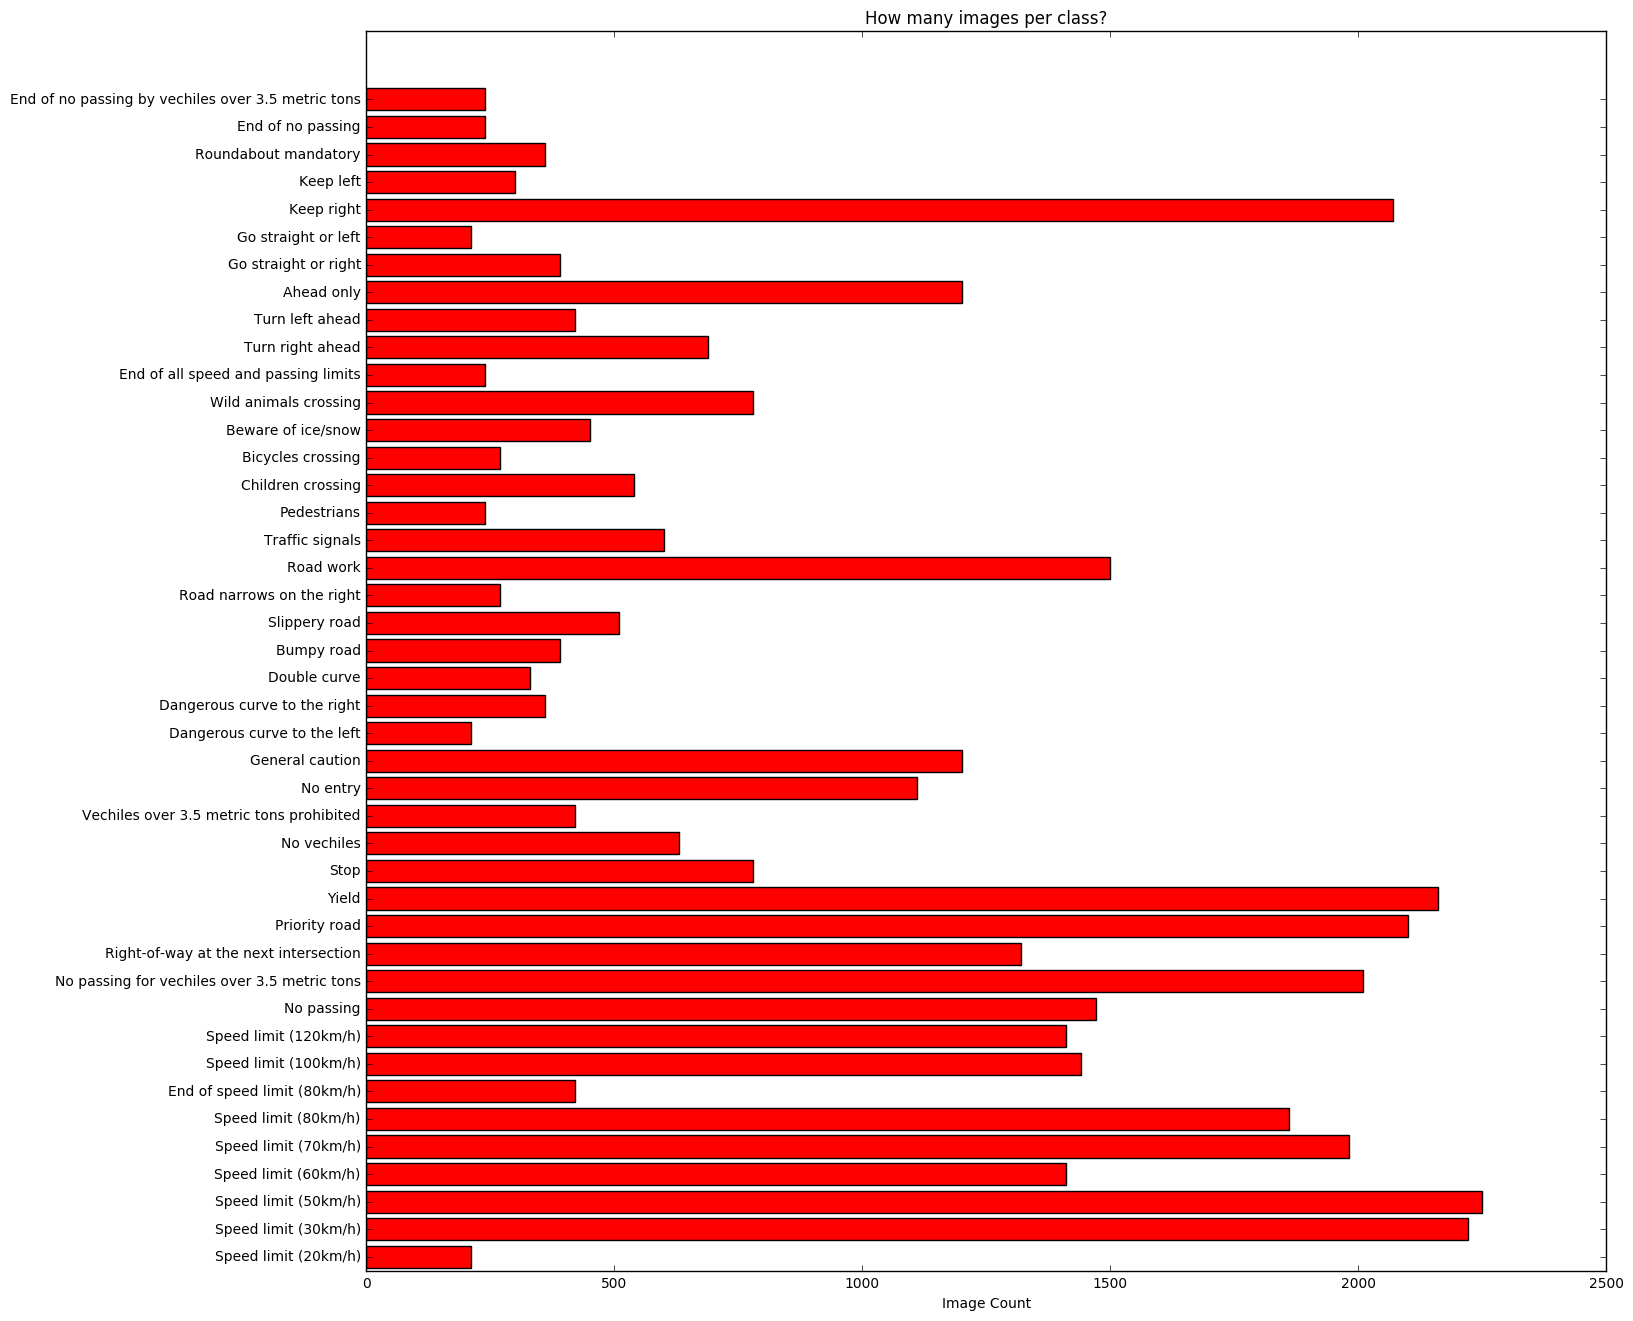

In [13]:
from pylab import *

train_features = np.array(train['features'])
train_labels = np.array(train['labels'])

class_count = np.bincount(train_labels)
#val = 3+10*rand(43)    # the bar lengths
pos = arange(43)+.5    # the bar centers on the y axis

figure(111,figsize = (16,16))
barh(pos,class_count, align='center',color='red')
yticks(pos, sign_name,)
xlabel('Image Count')
title('How many images per class?')
#grid(True)

show()


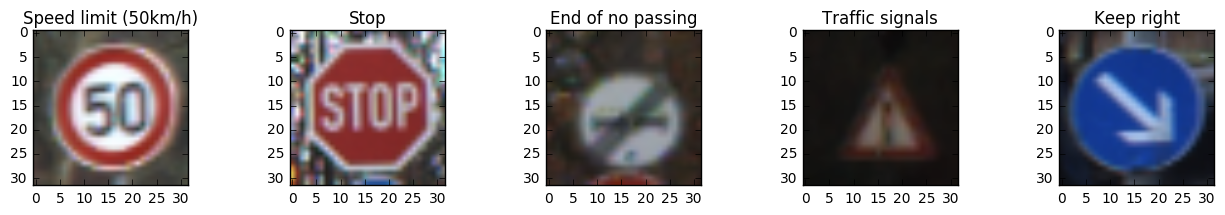

In [14]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
import random

array = np.random.rand(1,5)

#for line in image_show:
image_show = 5
fig, ax = plt.subplots(1,image_show,figsize=(16,2))
for i in range(image_show):
    show = random.randint(0,n_train)
    reshape = scipy.misc.imresize((X_train[show]), [32, 32])
    ax[i].imshow(reshape,cmap=cm.Greys_r)
    ax[i].set_title(sign_name[y_train[show]])
    
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**
The first step I am random shuffle the dataset by zip the features and labels together, shuffle and unzip. 

Shuffle the training dataset...


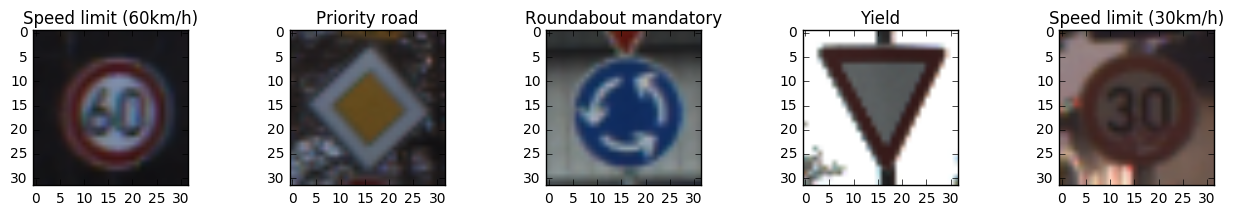

In [15]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
print('Shuffle the training dataset...')
import random
#shuffle list of images
c = list(zip(X_train, y_train))
random.shuffle(c)

X_train, y_train = zip(*c)

#for line in image_show:
image_show = 5
fig, ax = plt.subplots(1,image_show,figsize=(16,2))
for j in range(image_show):
    show = random.randint(0,n_train)
    resize = scipy.misc.imresize((X_train[j]), [32, 32])
    ax[j].imshow(resize,cmap=cm.Greys_r)
    ax[j].set_title(sign_name[y_train[j]])
            
plt.show()



Apply same process to testing dataset.

Shuffle the testing dataset...


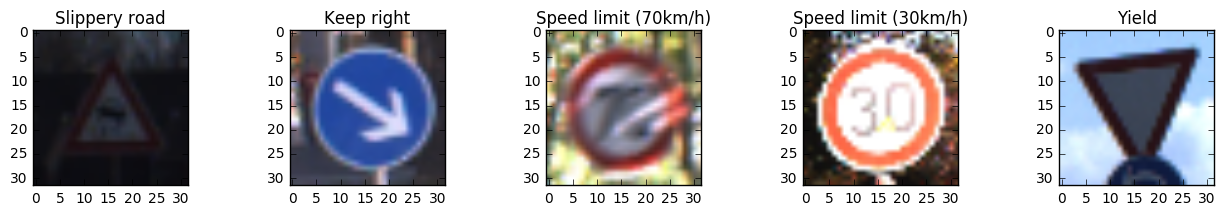

In [16]:
print('Shuffle the testing dataset...')

import random
#shuffle testset images
d = list(zip(X_test, y_test))
random.shuffle(d)

X_test, y_test = zip(*d)

#for line in image_show:
image_show = 5
fig, ax = plt.subplots(1,image_show,figsize=(16,2))
for k in range(image_show):
    resize = scipy.misc.imresize((X_test[k]), [32, 32])
    ax[k].imshow(resize)
    ax[k].set_title(sign_name[y_test[k]])
    
        
plt.show()



The above barchart shows "Number of examples per label" in original training dataset. 
Some examples such as (30km/h, 50km/h,Yield,Priority road,Keep right) have over 2700 samples for each label. 
Other examples such as (20km/h, Dangerous Curve to the left, Pedestrians, Go straight or left) have only 250 sample for each label. But those rare signs are equally important for the training. Build self-driving car that can handle school zone, new environment is the biggest challenge. 
There are many ways can try. I choose two here:
* Merge provide train set and test set together, yeild 39209+12630= 51839 real samples
* Rotate the sample image in range +/-20 degrees, generate additional samples for underrepresented classes
  This step will bring those rare samples (such as 20km/h, Pedestrian, etc) up to 2000+ level. 

Then split the total dataset 80:20 for trainset and testset. 
With in the trainset, split 80:20 again for training set and validation set. 
Therefore, I can train the model on ~65796 samples, validate on ~16449 samples, test on ~20544 samples.

In [17]:
print('Merge training set and testing set...')

X_all = np.concatenate((X_train, X_test), axis = 0)
y_all = np.concatenate((y_train, y_test), axis = 0)

print('Merge completed. Number of total samples', len(y_all))

Merge training set and testing set...
Merge completed. Number of total samples 51839


Counting samples per class...


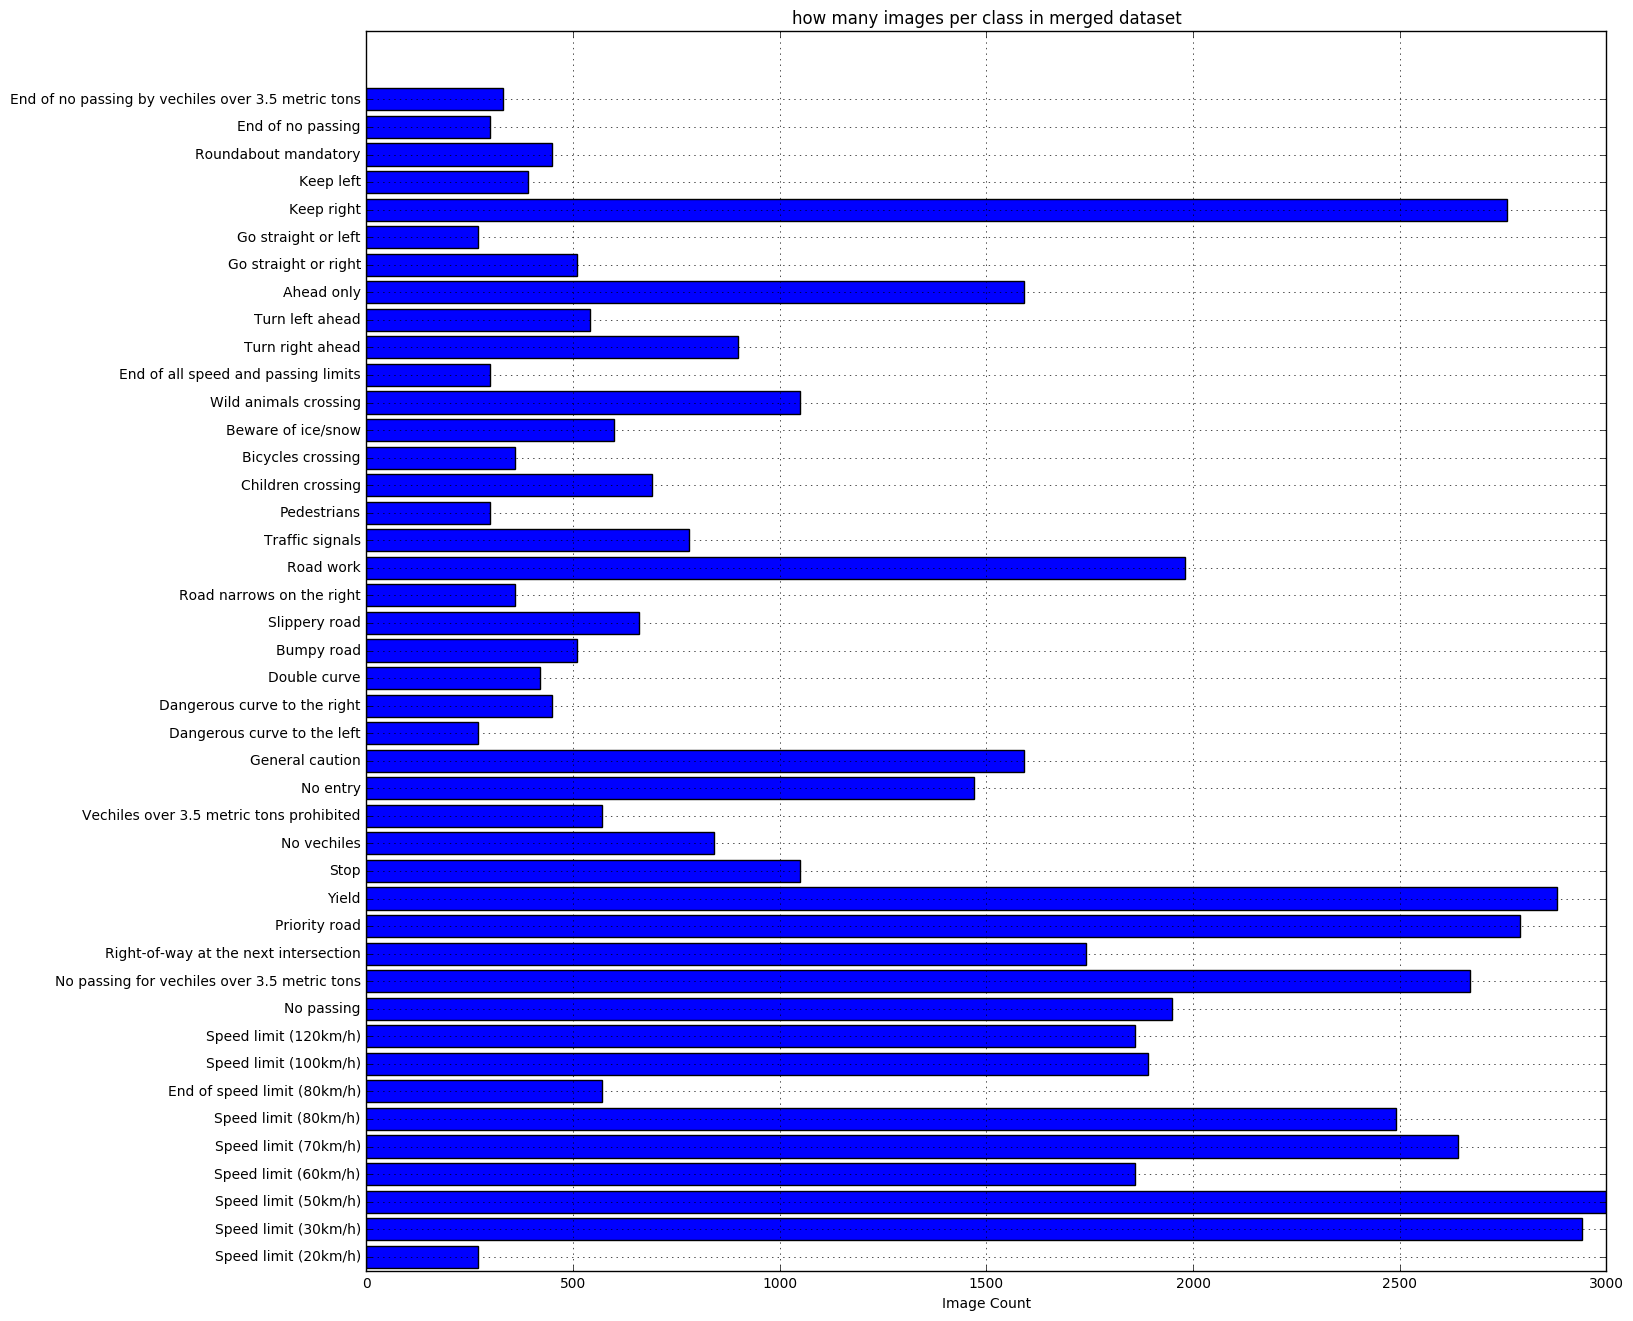

In [18]:
print('Counting samples per class...')
from pylab import *

class_count = np.bincount(y_all)
pos = arange(43)+.5    # the bar centers on the y axis

figure(111,figsize = (16,16))
barh(pos,class_count, align='center',)
yticks(pos, sign_name,)
xlabel('Image Count')
title('how many images per class in merged dataset')
grid(True)

show()

In [19]:
print('Regenerating data...')

import scipy.ndimage

# Generate additional data for underrepresented classes
print('Generating additional data...')
angles = [-5, 5, -10, 10, -15, 15, -20, 20]

for i in range(len(class_count)):
    input_ratio = min(int(np.max(class_count) / class_count[i]) - 1, len(angles) - 1)

    if input_ratio <= 1:
        continue

    new_features = []
    new_labels = []
    mask = np.where(y_all == i)

    for j in range(input_ratio):
        for feature in X_all[mask]:
            new_features.append(scipy.ndimage.rotate(feature, angles[j], reshape=False))
            new_labels.append(i)

    X_all = np.append(X_all, new_features, axis=0)
    y_all = np.append(y_all, new_labels, axis=0)

print('Regenarating data completed. Number of total samples', len(y_all))

Regenerating data...
Generating additional data...
Regenarating data completed. Number of total samples 102807


Counting samples per class...


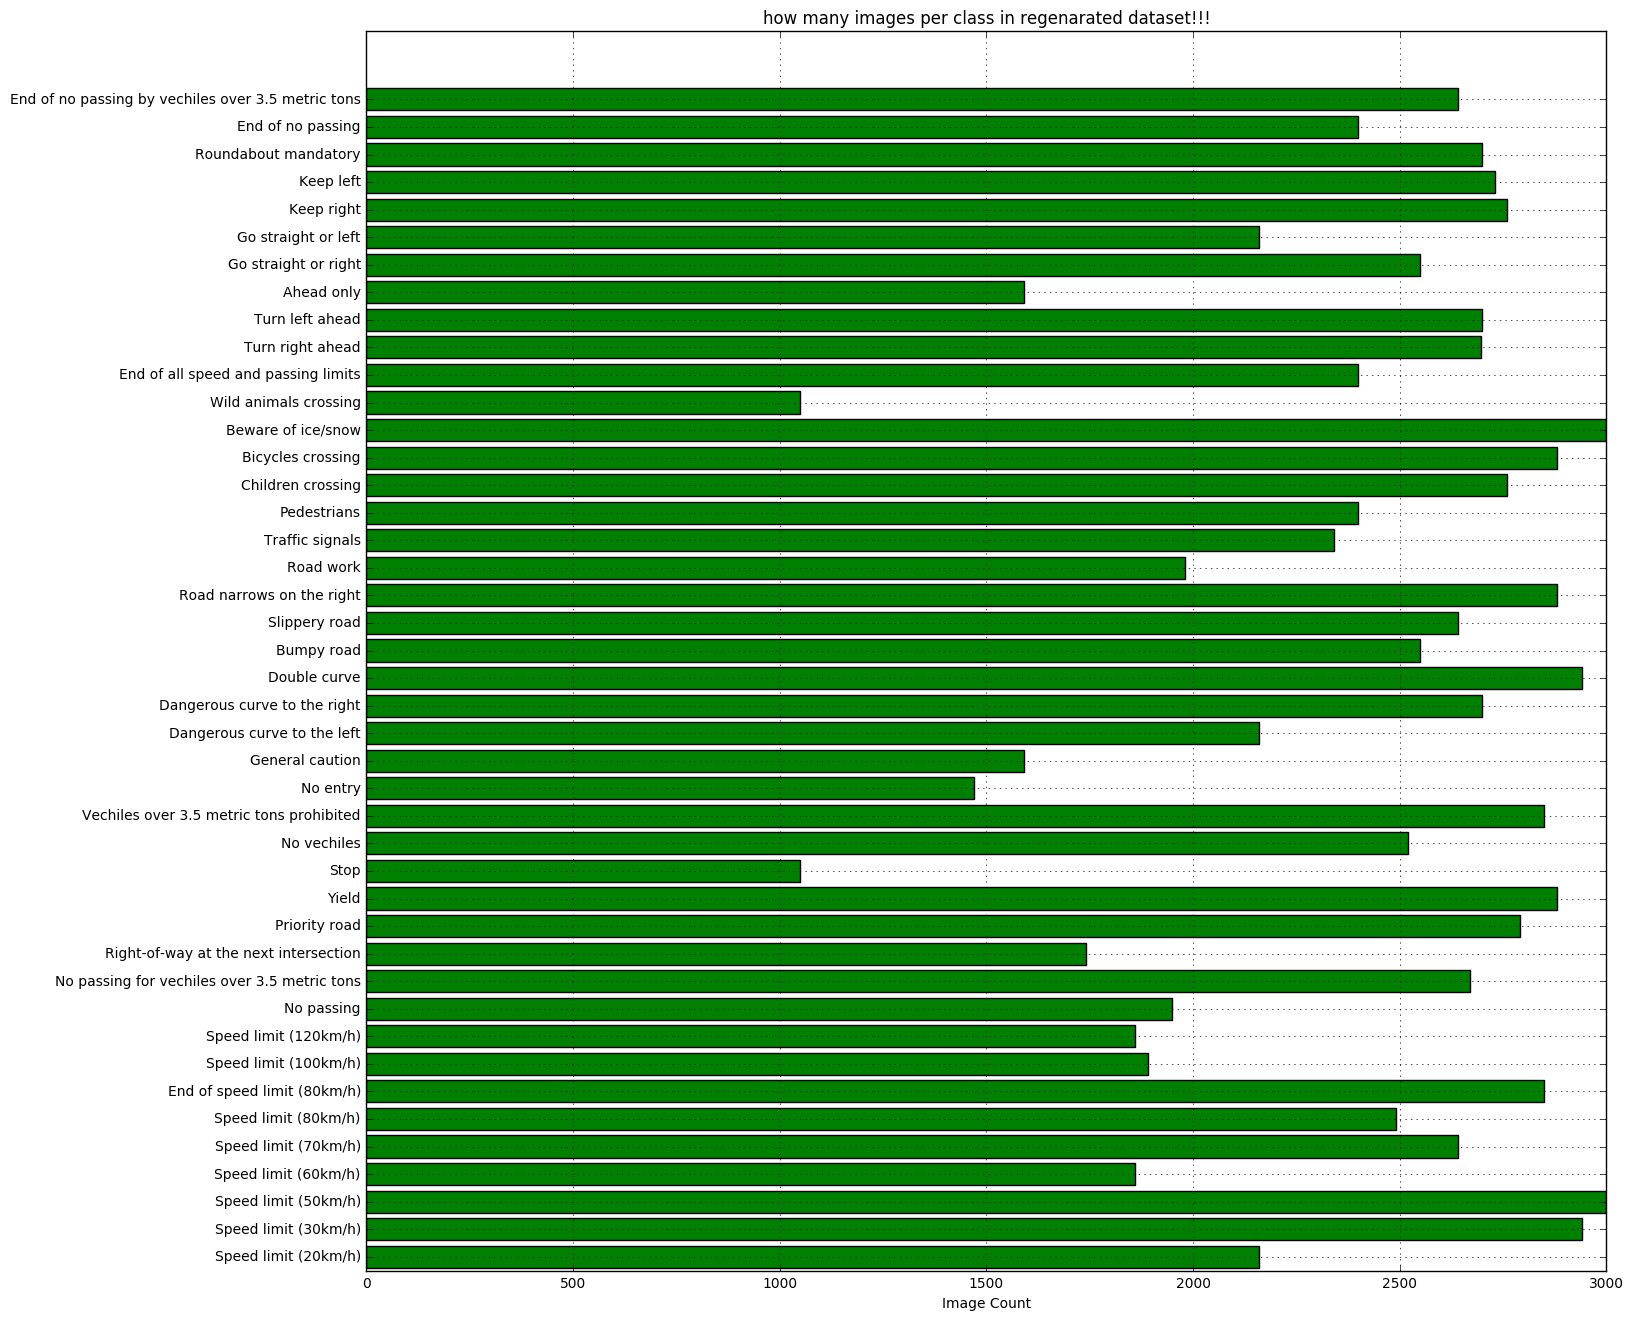

In [20]:
print('Counting samples per class...')
from pylab import *

class_count = np.bincount(y_all)
pos = arange(43)+.5    # the bar centers on the y axis

figure(111,figsize = (16,16))
barh(pos,class_count, align='center',color='green')
yticks(pos, sign_name,)
xlabel('Image Count')
title('how many images per class in regenarated dataset!!!')
grid(True)

show()

The lowest count samples(such as stop and Wild animals crossing) are over 1000, I think that is enough to proceed. 
Shuffle the data again and display: 

Shuffle the total dataset...


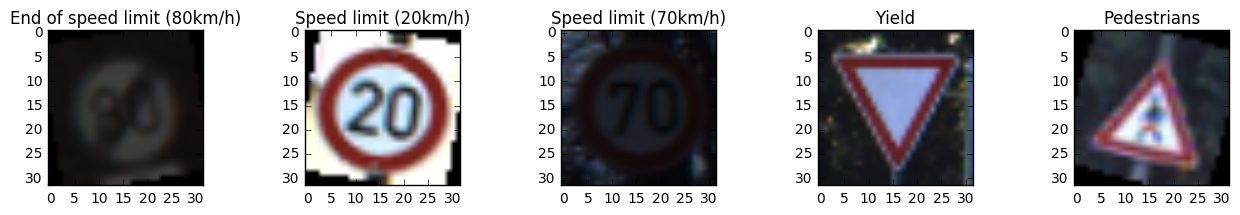

In [21]:
print('Shuffle the total dataset...')

import random
#shuffle the images
d = list(zip(X_all, y_all))
random.shuffle(d)

X_total, y_total = zip(*d)

#for line in image_show:
image_show = 5
fig, ax = plt.subplots(1,image_show,figsize=(16,2))
for k in range(image_show):
    resize = scipy.misc.imresize((X_total[k]), [32, 32])
    ax[k].imshow(resize)
    ax[k].set_title(sign_name[y_total[k]])
    
        
plt.show()


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

I almost doubled the total samples from original 39209+12630= 51839 real samples 

You can see some rotated images are showing. It will take care some cases like camera shaking or place at not perfect angle. For future work, maybe can add tilt, warp and shift to the image. The dataset can be easily grow 5-10 times bigger. 

For this project, I am using 80:20 split on total dataset to get testing set 20562 samples.
Then split the training set 80:20 again to get training set 65796 samples and validation set 16449 samples. 

Even in validation set, the lowest image count per class (such as stop sign) is over 150, greater than "30 rule", I am ok to proceed with these setting.  

In [22]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [23]:
print('splitting the total data into training/validation/testing sets...')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, stratify = y_all )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify = y_train )
print('Number of training samples', len(y_train))
print('Number of validation samples', len(y_val))
print('Number of testing samples', len(y_test))

splitting the total data into training/validation/testing sets...
Number of training samples 65796
Number of validation samples 16449
Number of testing samples 20562


Counting samples per class...


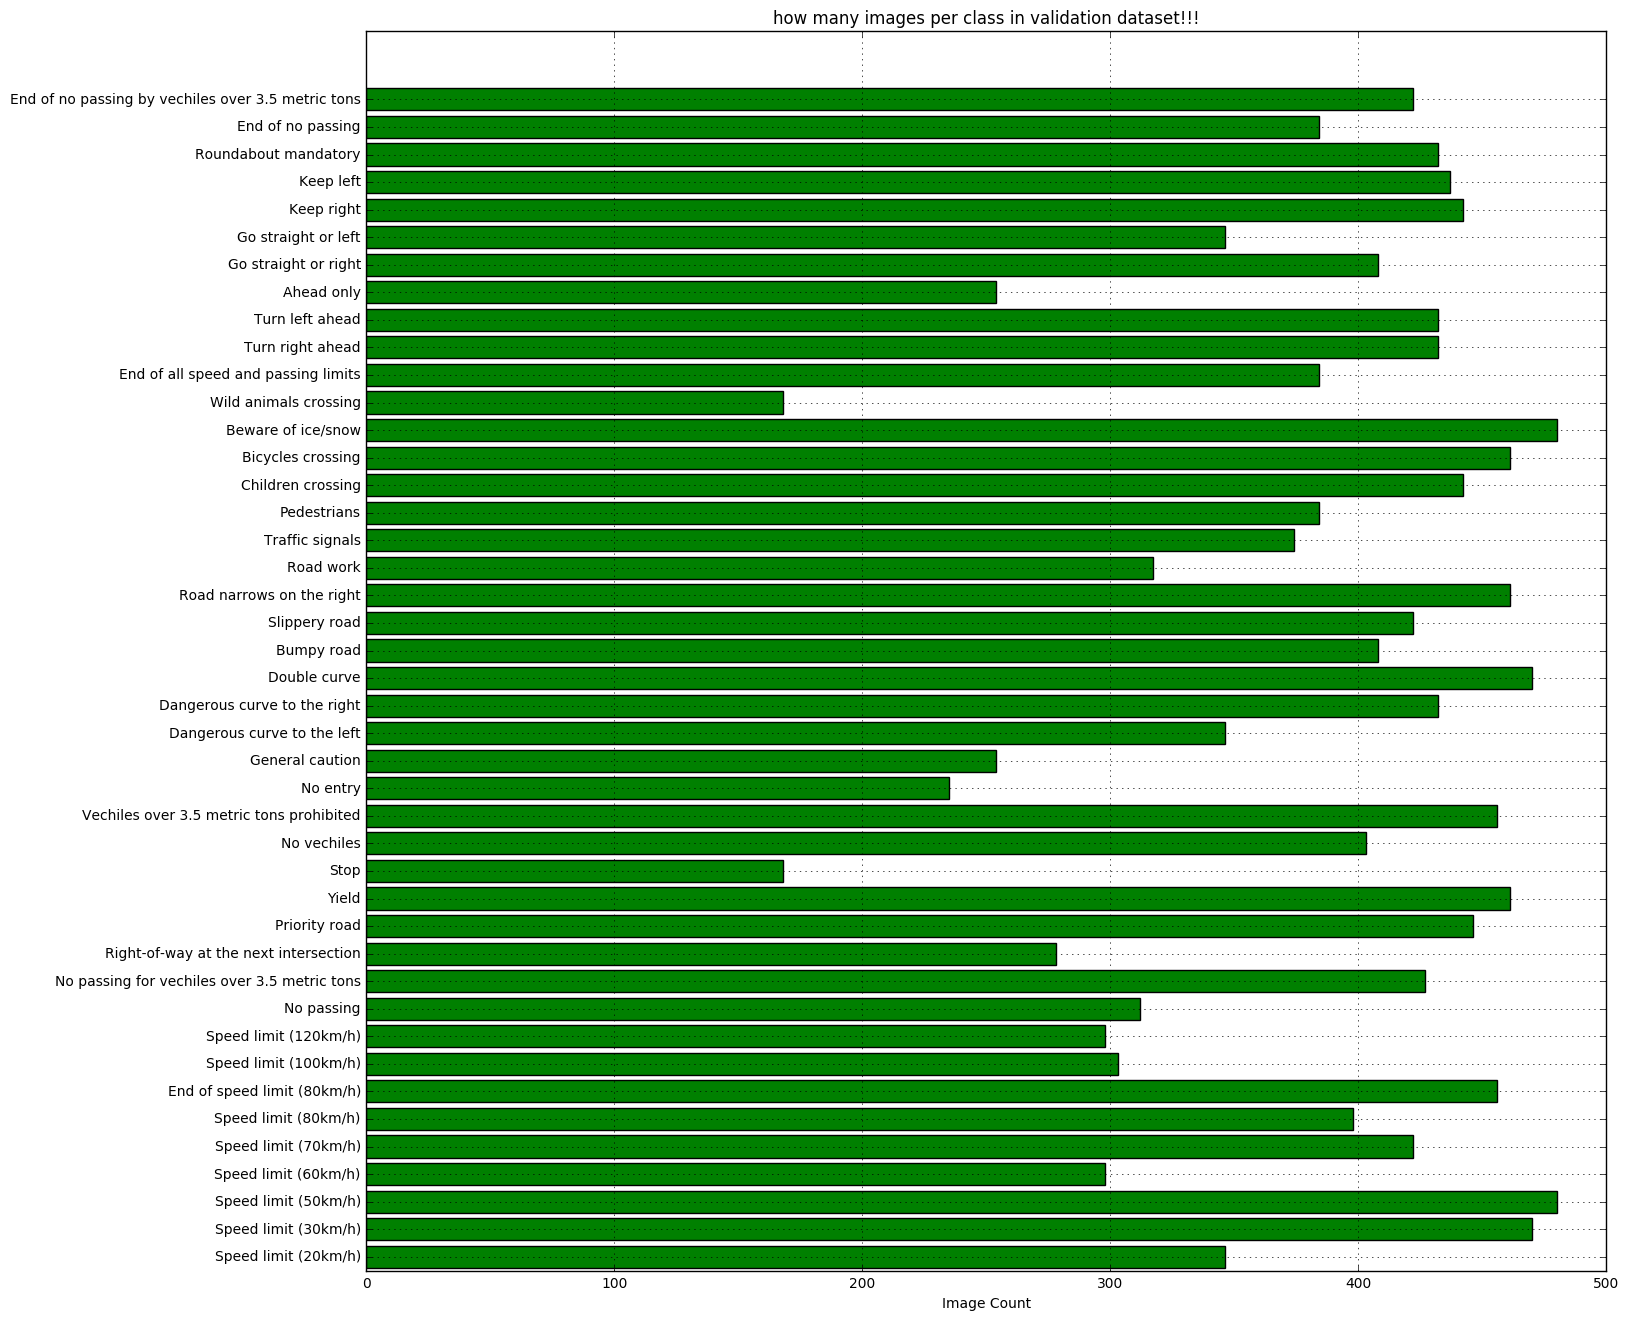

In [24]:
print('Counting samples per class...')
from pylab import *

class_count = np.bincount(y_val)
pos = arange(43)+.5    # the bar centers on the y axis

figure(111,figsize = (16,16))
barh(pos,class_count, align='center',color='green')
yticks(pos, sign_name,)
xlabel('Image Count')
title('how many images per class in validation dataset!!!')
grid(True)

show()

In [25]:

from keras.utils import np_utils
print('Reformat labels into tensorflow friendly format')

y_val = np_utils.to_categorical(y_val, 43)
y_train = np_utils.to_categorical(y_train, 43)
y_test = np_utils.to_categorical(y_test, 43)

print("Training label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Testing label shape",y_test.shape)


Using TensorFlow backend.


Reformat labels into tensorflow friendly format
Training label shape (65796, 43)
Validation label shape (16449, 43)
Testing label shape (20562, 43)


In [26]:
print(y_test[2500:2501])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]]


All label sets are converted to one-hot format.
All sample set data types are converted to astype('float32') to match tensorflow placeholder format. 
All sample values are normalized to between value 0 to 1. Different premeter (array = array /255 * 0.8 + 0.1) and other formular are tried. The current one is better. For future work, maybe different normalization rated samples can also use for training, validation and testing. The dataset can be easily grow bigger. 

In [27]:
print('Normalizing samples data...')
def norm(array):
    array = array.astype('float32')
    array = array / 255*0.8 + 0.1
    return array

X_train = norm(X_train)
X_val = norm(X_val)
X_test = norm(X_test)

print("Training data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Testing data shape",X_test.shape)

Normalizing samples data...
Training data shape (65796, 32, 32, 3)
Validation data shape (16449, 32, 32, 3)
Testing data shape (20562, 32, 32, 3)


In [144]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

print('Build a four-layer convolution neural network with Keras here.')
from keras.layers import Conv2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Input, Activation
from keras.callbacks import EarlyStopping
earlystop= EarlyStopping(min_delta= 0.008, patience= 2, verbose=1)

Build a four-layer convolution neural network with Keras here.


In [145]:
model = Sequential()
model.add(Conv2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.summary()
# Compile and train the model here.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_2 (Convolution2D)  (None, 30, 30, 32)    896         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 28800)         0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 128)           3686528     flatten_2[0][0]                  
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 43)            5547        dense_3[0][0]                    
Total params: 3692971
_____________________________________________________________________

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The final architecture is four layers convolution network. 
The Input size (32*32*3), first layer run 3x3 convolution on it, input depth is 3, output depth is 32, 'valid' padding, Stride '1', so the first layer output shape is [30x30x32].
Follow with a flatten layer, it transfer 3D shape 30x30x32 to 1D 28800 output connecters.
Next fully connected layer has 128 outputs, it makes (28800 weights+1 bias)x 128=3685528 parameters. 
Final layer is 43 classes outputs. It makes (128+1)x 43 = 5547 parameters.

Total 896+3686528+5547=3692971 parameters.   

In [31]:
model.fit(X_train, y_train,
                    batch_size=256, nb_epoch=20,
                    verbose=1, validation_data=(X_val, y_val), callbacks = [earlystop])

Train on 65796 samples, validate on 16449 samples
Epoch 1/20
65796/65796 [==============================] - 58s - loss: 1.4223 - acc: 0.6302 - val_loss: 0.8042 - val_acc: 0.7632
Epoch 2/20
65796/65796 [==============================] - 58s - loss: 0.4460 - acc: 0.8886 - val_loss: 0.3457 - val_acc: 0.9220
Epoch 3/20
65796/65796 [==============================] - 58s - loss: 0.2594 - acc: 0.9382 - val_loss: 0.2442 - val_acc: 0.9393
Epoch 4/20
65796/65796 [==============================] - 58s - loss: 0.1778 - acc: 0.9589 - val_loss: 0.1843 - val_acc: 0.9570
Epoch 5/20
65796/65796 [==============================] - 60s - loss: 0.1257 - acc: 0.9715 - val_loss: 0.1568 - val_acc: 0.9627
Epoch 6/20
65796/65796 [==============================] - 63s - loss: 0.0965 - acc: 0.9788 - val_loss: 0.1400 - val_acc: 0.9672
Epoch 7/20
65796/65796 [==============================] - 63s - loss: 0.0764 - acc: 0.9839 - val_loss: 0.1176 - val_acc: 0.9736
Epoch 8/20
65796/65796 [==============================

In [146]:
import h5py
from keras.models import load_model

#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [147]:
model.evaluate(X_test, y_test)

20544/20562 [============================>.] - ETA: 0s

[0.077868610256453072, 0.98322147651006708]

In [33]:
model.evaluate(X_val, y_val)

16448/16449 [============================>.] - ETA: 0s

[0.076798939406378081, 0.98437594990576938]

In [34]:
model.evaluate(X_train[:20000], y_train[:20000])

20000/20000 [==============================] - 8s     


[0.019286309673869982, 0.99670000000000003]

In [148]:
confidence = model.evaluate(X_test, y_test)
print(confidence)

20544/20562 [============================>.] - ETA: 0s[0.077868610256453072, 0.98322147651006708]


In [149]:
pred = model.predict_classes(X_test)

20544/20562 [============================>.] - ETA: 0s

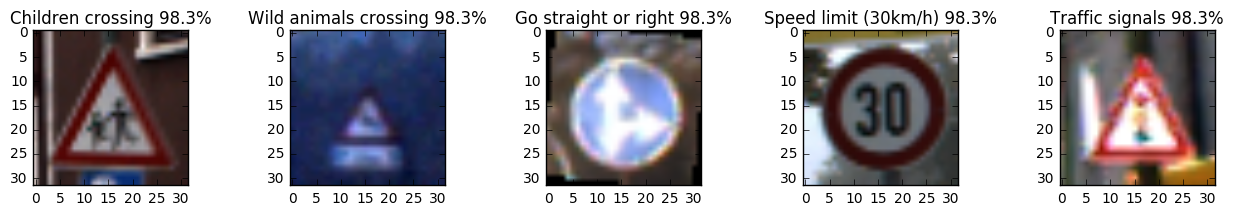

In [150]:
import random
#for line in image_show:
image_show = 5
fig, ax = plt.subplots(1,image_show,figsize=(16,2))
for k in range(image_show):
    show = random.randint(0,len(pred))
    resize = scipy.misc.imresize((X_test[show]), [32, 32])
    ax[k].imshow(resize)
    ax[k].set_title(str(sign_name[pred[show]]) +' '+ str(confidence[1]*100)[:4]+"%")
    
        
plt.show()


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

There is "Relu" function in the first layer and third layer. Relu performs little better than other function such as "sigmoid" for this kind of task. 

I choose "adam" optimizer because it is a efficient stochastic optimization with little memory requirement on CPU tensorflow. 

The "softmax" in last layer is for mapping the outputs into 43 classes. 

Batch size is setted to 256, Epoch is setted to 20, but after 8-10 runs, the model reached 99% accurcy on training set, and 97.7% on validation set. There is no need to run further. 

The model also evaluated on test set, it scored 98% accurcy. 

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**
Training needs lot of data. During first check of the data, some class has more sample than others. How to get a dataset that each class has close number of samples? Is the model will be certain on some signs and not certain on others?

First, I increase the avalible training set by merge provided train.p and test.p together. 
Second, I increase the underrepercented samples count by rotate the image a small angles, it also correct some camera setup issues. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

This image is: <class 'numpy.ndarray'> with dimesions: (951, 2085, 3)


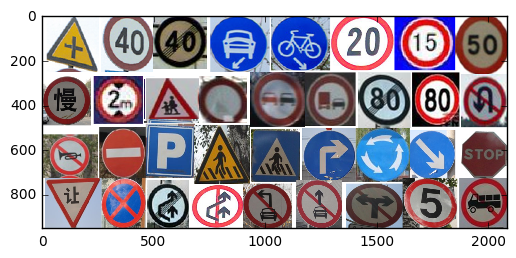

In [197]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

#reading in an image
image1 = mpimg.imread('JEI_22_4_041105_f010.png')
image2 = mpimg.imread('images.jpeg')
image3 = mpimg.imread('3230065-building-site-with-traffic-signs.jpg')
image4 = mpimg.imread('onlineImage.jpeg')
image5 = mpimg.imread('images2.jpeg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
#plt.imshow(image1) 
plt.imshow(image1) 

created new picture set


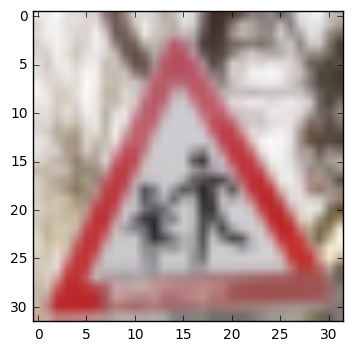

In [209]:
import scipy.misc
#image_list = [[0,240,0,240],[500,735,1650,1880],[500,735,1850,2085],[0,260,1850,2085],[0,240,240,490],[230,480,960,1200],[230,464,468,708],[500,735,230,470],[500,732,1847,2085],[713,951,230,468]]
image_list = [[0,140,90,250]]
X_new = []

for i in range(len(image_list)):
    crop = image2[image_list[i][0]:image_list[i][1],image_list[i][2]:image_list[i][3]]
    resize = scipy.misc.imresize((crop), [32, 32])
    X_new.append(resize)
    plt.imshow(resize) 
    
print ('created new picture set')

created new picture set


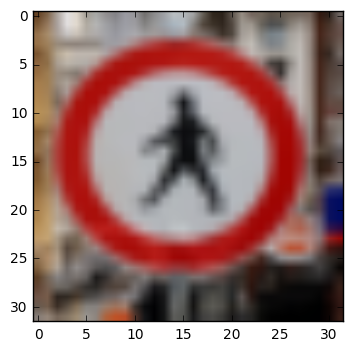

In [210]:
import scipy.misc
#image_list = [[0,240,0,240],[500,735,1650,1880],[500,735,1850,2085],[0,260,1850,2085],[0,240,240,490],[230,480,960,1200],[230,464,468,708],[500,735,230,470],[500,732,1847,2085],[713,951,230,468]]
#image_list = [[0,140,90,250]]
image_list = [[80,340,0,300],[90,320,300,520],[80,320,530,755]]

#X_new =[]
for i in range(len(image_list)):
    crop = image3[image_list[i][0]:image_list[i][1],image_list[i][2]:image_list[i][3]]
    resize = scipy.misc.imresize((crop), [32, 32])
    X_new.append(resize)
    plt.imshow(resize) 
    
print ('created new picture set')

created new picture set


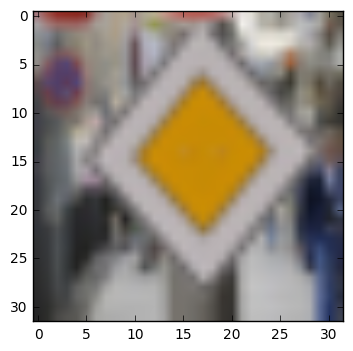

In [211]:
import scipy.misc
#image_list = [[0,240,0,240],[500,735,1650,1880],[500,735,1850,2085],[0,260,1850,2085],[0,240,240,490],[230,480,960,1200],[230,464,468,708],[500,735,230,470],[500,732,1847,2085],[713,951,230,468]]
#image_list = [[0,140,90,250]]
#image_list = [[80,340,0,300],[90,320,300,520],[80,320,530,755]]
image_list = [[50,140,150,250],[130,230,150,250]]

#X_new =[]
for i in range(len(image_list)):
    crop = image4[image_list[i][0]:image_list[i][1],image_list[i][2]:image_list[i][3]]
    resize = scipy.misc.imresize((crop), [32, 32])
    X_new.append(resize)
    plt.imshow(resize) 
    
print ('created new picture set')

created new picture set


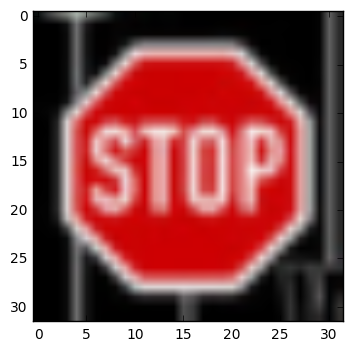

In [212]:
import scipy.misc
#image_list = [[0,240,0,240],[500,735,1650,1880],[500,735,1850,2085],[0,260,1850,2085],[0,240,240,490],[230,480,960,1200],[230,464,468,708],[500,735,230,470],[500,732,1847,2085],[713,951,230,468]]
image_list = [[85,155,95,165]]

#X_new = []

for i in range(len(image_list)):
    crop = image5[image_list[i][0]:image_list[i][1],image_list[i][2]:image_list[i][3]]
    resize = scipy.misc.imresize((crop), [32, 32])
    X_new.append(resize)
    plt.imshow(resize) 
    
print ('created new picture set')

created new picture set


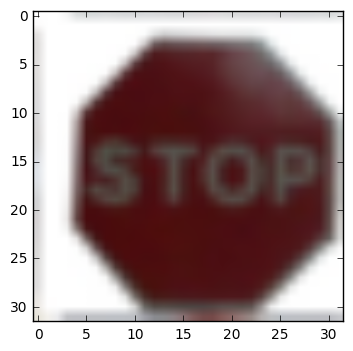

In [213]:
import scipy.misc
image_list = [[0,240,0,240],[500,735,1650,1880],[500,735,1850,2085],[0,260,1850,2085],[0,240,240,490],[230,480,960,1200],[230,464,468,708],[500,735,230,470],[500,732,1847,2085]]
#image_list = [[0,140,90,250]]

#X_new = []

for i in range(len(image_list)):
    crop = image1[image_list[i][0]:image_list[i][1],image_list[i][2]:image_list[i][3]]
    resize = scipy.misc.imresize((crop), [32, 32])
    X_new.append(resize)
    plt.imshow(resize) 
    
print ('created new picture set')

random display new picture set


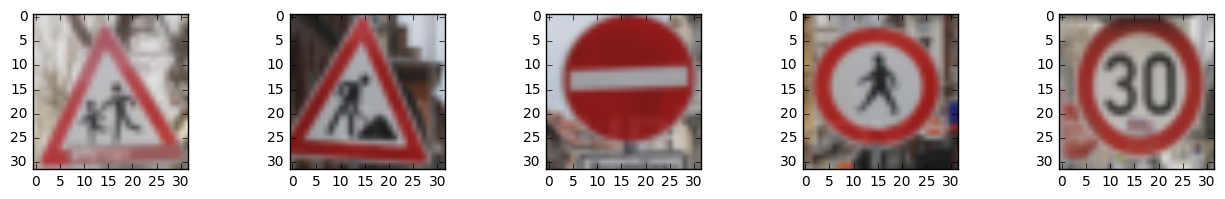

In [219]:
print ('random display new picture set')
import random

#for line in image_show:
image_show = 5
fig, ax = plt.subplots(1,image_show,figsize=(16,2))
for k in range(image_show):
    show = random.randint(0,len(X_new))
    #resize = scipy.misc.imresize((X_new[k]), [32, 32])
    ax[k].imshow(X_new[k])
    #ax[k].set_title(str(sign_name[pred[show]]) +' '+ str(confidence[1]*100)[:4]+"%")
    
        
plt.show()


In [215]:
print('Normalizing samples data...')
def norm(array):
    array = array.astype('float32')
    array = array / 255*0.8 + 0.1
    return array

X_new = np.array(X_new)

X_new = norm(X_new)
#X_val = norm(X_val)
#X_test = norm(X_test)

print("New data shape",X_new.shape)
#print("Validation data shape",X_val.shape)
#print("Testing data shape",X_test.shape)

Normalizing samples data...
New data shape (16, 32, 32, 3)


In [216]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [217]:
pred_new = model.predict_classes(X_new)

16/16 [==============================] - 0s


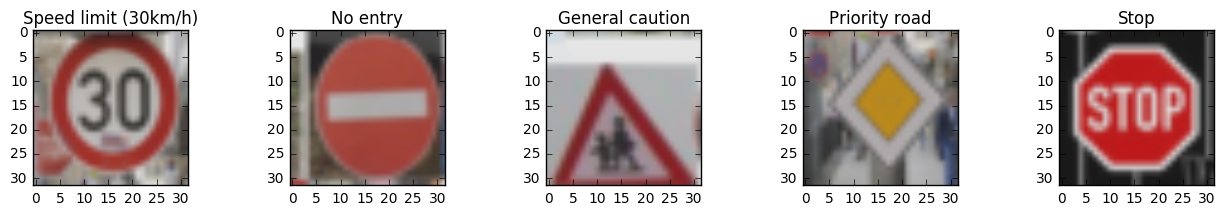

In [229]:
import random
#for line in image_show:

image_show = 5
fig, ax = plt.subplots(1,image_show,figsize=(16,2))
for k in range(image_show):
    show = random.randint(0,len(pred_new))
    #resize = scipy.misc.imresize((X_new[show]), [32, 32])
    ax[k].imshow(X_new[show])
    ax[k].set_title(str(sign_name[pred_new[show]]))
    
        
plt.show()


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

It seems the model has some difficulty reading some speed limit signs. 

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

On the splitted testset, the model performed 0.9785 accuracy on 20562 samples. 
But on the new test sample, as shown, two signs are wrong. 
One it never see before, the model picked the blue color background and orientation of the lines. 
The wild animals crossing is worry, it is human crossing. The model pick up the triangle shape, white background, and something walking. Whatever, if the car make stop and wait descion, it will be right. 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

N/A for this case. 

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

New acquired images go through the same pre-processing pipeline and training set. 
The predict all images at once, than random display 5 images.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.